# **Sơ bộ về Nấm**
Nấm đã được con người ăn hàng nghìn năm nay. Tất cả các loại nấm đều chứa protein, chất xơ và chất selen chống oxy hóa mạnh mẽ. Nấm phân bố trên toàn thế giới và phát triển ở nhiều dạng môi trường sống khác nhau, kể cả sa mạc, nơi tập trung nồng độ muối cao hay có bức xạ ion hóa, cũng như trầm tích biển sâu.Đa phần nấm sống ở trên cạn. Tuy nhiên, một số loại nấm có chứa psilocybin, một hợp chất gây ảo giác đã bị cấm ở Mỹ và một số loài có độc gây hại cho người ăn.

==> Điều này càng củng cố việc phân loại nấm là rất quan trọng

Bộ dữ liệu này bao gồm 61069 loại nấm giả định có mũ dựa trên 173 loài (353 loại nấm mỗi loài). Mỗi loại nấm được xác định là chắc chắn ăn được, chắc chắn có độc hoặc không xác định được khả năng ăn được và không được khuyến khích (loại sau được kết hợp với loại độc).

# <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>1 | Statistics and processing</div></b>

## <b><span style='color:#DEB078'>1.1 |</span><span style='color:#016CC9'> Dataset Description</span></b>  

One binary class divided in edible=e and poisonous=p (with the latter one also containing mushrooms of unknown edibility).
Twenty remaining variables
(n: danh xưng, m: số liệu)
1. cap-diameter (m): đường kính mũ nấm (kiểu số thực có đơn vị đo bằng cm)
2. cap-shape (n): hình dạng mũ nấm
bell(chuông)=b, conical(nón)=c, convex(lồi)=x, flat(phẳng)=f,
sunken(chìm)=s, spherical(cầu)=p, others=o
3. cap-surface (n): bề mặt mũ nấm
fibrous(sợi)=i, grooves(rãnh)=g, scaly(vảy)=y, smooth(trơn tru)=s,
shiny (sáng bóng)=h, leathery (da)=l, silky(mướt)=k, sticky(dính)=t,
wrinkled(nhăn nheo)=w, fleshy (nhiều nhựa)=e
4. cap-color (n): màu sắc mũ nấm
brown=n, buff=b, gray=g, green=r, pink=p,
purple=u, red=e, white=w, yellow=y, blue=l,
orange=o, black=k
5. does-bruise-bleed (n): nấm có vết bầm hoặc bị chảy nhựa hay không? bruises-or-bleeding=t,no=f
6. gill-attachment (n): lá màng nấm
adnate=a, adnexed=x, decurrent=d, free=e,
sinuate=s, pores=p, none=f, unknown=?
7. gill-spacing (n): khoảng cách các lá màng
 close=c, distant=d, none=f
8. gill-color (n): màu sắc lá màng
see cap-color + none=f
9. stem-height (m): chiều cao thân nấm (kiểu số thực có đơn vị đo bằng cm)
10. stem-width (m): chiều rộng thân nấm (kiểu số thực có đơn vị đo bằng mm)
11. stem-root (n): gốc nấm
bulbous=b, swollen=s, club=c, cup=u, equal=e,
rhizomorphs=z, rooted=r
12. stem-surface (n): bề mặt thân nấm
 see cap-surface + none=f
13. stem-color (n): màu sắc thân nấm
see cap-color + none=f
14. veil-type (n): loại mạng che của nấm
 partial(mạng che 1 phần)=p, universal(mạng che toàn phần)=u
15. veil-color (n): màu sắc của mạng che
 see cap-color + none=f
16. has-ring (n): có vòng hay không có - ring=t, none=f
17. ring-type (n): (mạng nhện- cobwebby)=c, (evanescent-tiêu tan lần)=e, (flaring-bừng lên)=r, (grooved-có rãnh)=g,
large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
urban=u, waste=w, woods=d
20. season (n): spring=s, summer=u, autumn=a, winter=w



## <b><span style='color:#DEB078'>1.2 |</span><span style='color:#016CC9'> Import Library</span></b>

### <b><span style='color:#DEB078'>1.2.1 |</span><span style='color:#016CC9'> Import Library</span></b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

### <b><span style='color:#DEB078'>1.2.2 |</span><span style='color:#016CC9'> Import Files</span></b>    

In [ ]:
df=pd.read_csv("/content/sample_data/secondary_data.csv")

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>1.3 | Dataframe Investigation</div></b>

### <b><span style='color:#DEB078'>1.3.1 |</span><span style='color:#016CC9'> Basic Steps</span></b>

In [ ]:
df.shape

(61069, 21)

In [ ]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [ ]:
# Check for null values for each attribute (column)
null_values_by_column = df.isnull().sum()

# Display the result
print("Null values by column:")
print(null_values_by_column)

Null values by column:
class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64


### <b><span style='color:#DEB078'>1.3.2 |</span><span style='color:#016CC9'> Fix Null Value</span></b>

In [ ]:
df = df.drop('veil-type', axis=1)
df = df.drop('veil-color', axis=1)
df = df.drop('stem-root', axis=1)
df = df.drop('spore-print-color', axis=1)
df = df.drop('stem-surface', axis=1)
# dữ liệu thiếu quá nhều, nên xóa đi các features này thì sẽ hiệu quả hơn

In [ ]:
df['cap-surface'].fillna(df['cap-surface'].mode()[0], inplace=True)

# Xử lý giá trị thiếu cho cột gill-attachment
df['gill-attachment'].fillna(df['gill-attachment'].mode()[0], inplace=True)

# Xử lý giá trị thiếu cho cột gill-spacing
df['gill-spacing'].fillna(df['gill-spacing'].mode()[0], inplace=True)

# Xử lý giá trị thiếu cho cột ring-type
df['ring-type'].fillna(df['ring-type'].mode()[0], inplace=True)

In [ ]:
# Check for null values for each attribute (column)
null_values_by_column = df.isnull().sum()

# Display the result
print("Null values by column:")
print(null_values_by_column)

Null values by column:
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64


### <b><span style='color:#DEB078'>1.3.3 |</span><span style='color:#016CC9'> Unique Value Check</span></b>

In [ ]:
df.nunique()

class                      2
cap-diameter            2571
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2226
stem-width              4630
stem-color                13
has-ring                   2
ring-type                  8
habitat                    8
season                     4
dtype: int64

# <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>2 | Analysis and Visualization</div></b>

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>2.1 | Update better Visualization</div></b>

In [ ]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,c,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,c,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,c,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,c,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,c,w,16.53,17.20,w,t,p,d,w


In [ ]:
df_copy = df.copy()

Update columns with values for better visualization

In [ ]:
#Đổi tên để hiển thị tốt hơn
class_mapping = {'e': 'edible', 'p': 'poisonous'}
cap_shape_mapping = {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 's': 'sunken', 'p': 'spherical', 'o': 'others'}
cap_color_mapping = {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink',
'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue',
'o': 'orange', 'k': 'black'}
cap_surface_mapping = {'i': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth',
'h': 'shiny', 'l': 'leathery', 'k': 'silky', 't': 'sticky',
'w': 'wrinkled', 'e': 'fleshy'}
bruises_mapping = {'t': 'bruises or bleeding', 'f': 'no'}
gill_attachment_mapping = {'a': 'adnate', 'x': 'adnexed', 'd': 'decurrent', 'e': 'free', 's': 'sinuate', 'p': 'pores', 'f': 'none'}
gill_spacing_mapping = {'c': 'close', 'd': 'distant', 'f': 'none'}
gill_color_mapping = {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink',
'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue',
'o': 'orange', 'k': 'black', 'f': 'none'}
stem_color_mapping = {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink',
'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue',
'o': 'orange', 'k': 'black', 'f':''}
has_ring_mapping = {'t': 'ring', 'f': 'none'}
#stem_surface_mapping = {'i': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth',
#'h': 'shiny', 'l': 'leathery', 'k': 'silky', 't': 'sticky', 'w': 'wrinkled', 'e': 'fleshy', 'f':'none'}
ring_type_mapping = {'c': 'cobwebby', 'e': 'evanescent', 'r': 'flaring', 'g': 'grooved','l': 'large', 'p': 'pendant', 's': 'sheathing', 'z': 'zone','y': 'scaly', 'm': 'movable', 'f': 'none'}
#ring_type_mapping = {'e': 'evanescent', 'r': 'flaring','l': 'large', 'z': 'zone', 'f': 'none'}
habitat_mapping ={'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths',
'h': 'heaths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
season_mapping = {'s': 'spring', 'u': 'summer', 'a': 'autumn', 'w': 'winter'}

attribute_mappings = {
    'class': class_mapping,
    'cap-shape': cap_shape_mapping,
    'cap-surface': cap_surface_mapping,
    'cap-color': cap_color_mapping,
    'does-bruise-or-bleed': bruises_mapping,
    'gill-attachment': gill_attachment_mapping,
    'gill-spacing': gill_spacing_mapping,
    'gill-color': gill_color_mapping,
    'stem-color': stem_color_mapping,
    #'stem-surface': stem_surface_mapping,
    'has-ring': has_ring_mapping,
    'ring-type': ring_type_mapping,
    'habitat': habitat_mapping,
    'season': season_mapping,
}

for column, mapping in attribute_mappings.items():
    df_copy[column] = df_copy[column].replace(mapping)

In [ ]:
# Display unique values for each attribute (column)
unique_values_by_column = df_copy.apply(lambda x: x.unique())

# Display the result
print("Unique values by column:")
print(unique_values_by_column)

Unique values by column:
class                                                 [poisonous, edible]
cap-diameter            [15.26, 16.6, 14.07, 14.17, 14.64, 15.34, 14.8...
cap-shape               [convex, flat, spherical, bell, conical, sunke...
cap-surface             [grooves, shiny, sticky, scaly, fleshy, smooth...
cap-color               [orange, red, brown, gray, green, white, yello...
does-bruise-or-bleed                            [no, bruises or bleeding]
gill-attachment         [free, adnate, decurrent, sinuate, adnexed, po...
gill-spacing                                       [close, distant, none]
gill-color              [white, brown, pink, purple, buff, gray, yello...
stem-height             [16.95, 17.99, 17.8, 15.77, 16.53, 17.84, 17.7...
stem-width              [17.09, 18.19, 17.74, 15.98, 17.2, 18.79, 16.8...
stem-color              [white, yellow, brown, purple, buff, blue, gre...
has-ring                                                     [ring, none]
ring-type    

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>2.2 | Analysis Dataset</div></b>

<Axes: title={'center': 'Count of Class'}, xlabel='class', ylabel='count'>

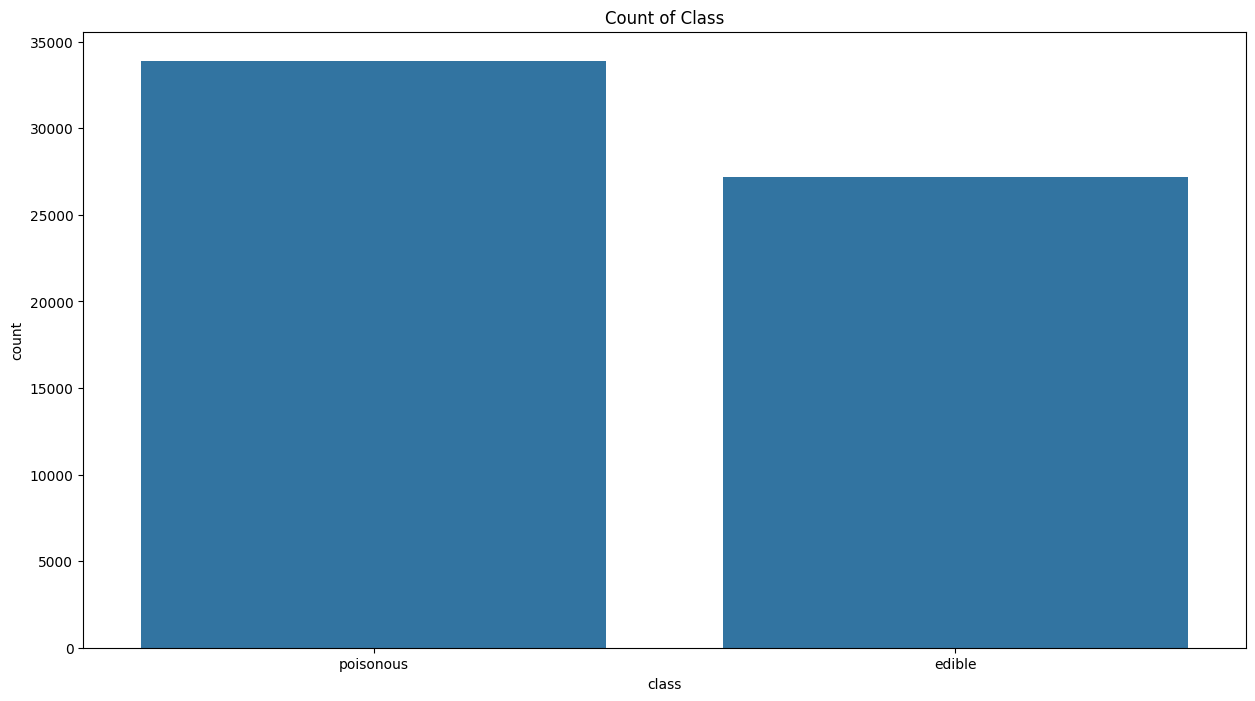

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count of Class')
sns.countplot(data=df_copy, x='class')

<ipython-input-16-7d4a562b072e>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-16-7d4a562b072e>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-16-7d4a562b072e>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-16-7d4a562b072e>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-16-7d4a562b072e>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-16-7d4a562b072e>:4: UserWarning: FixedFormatter should only be used together with FixedLocator


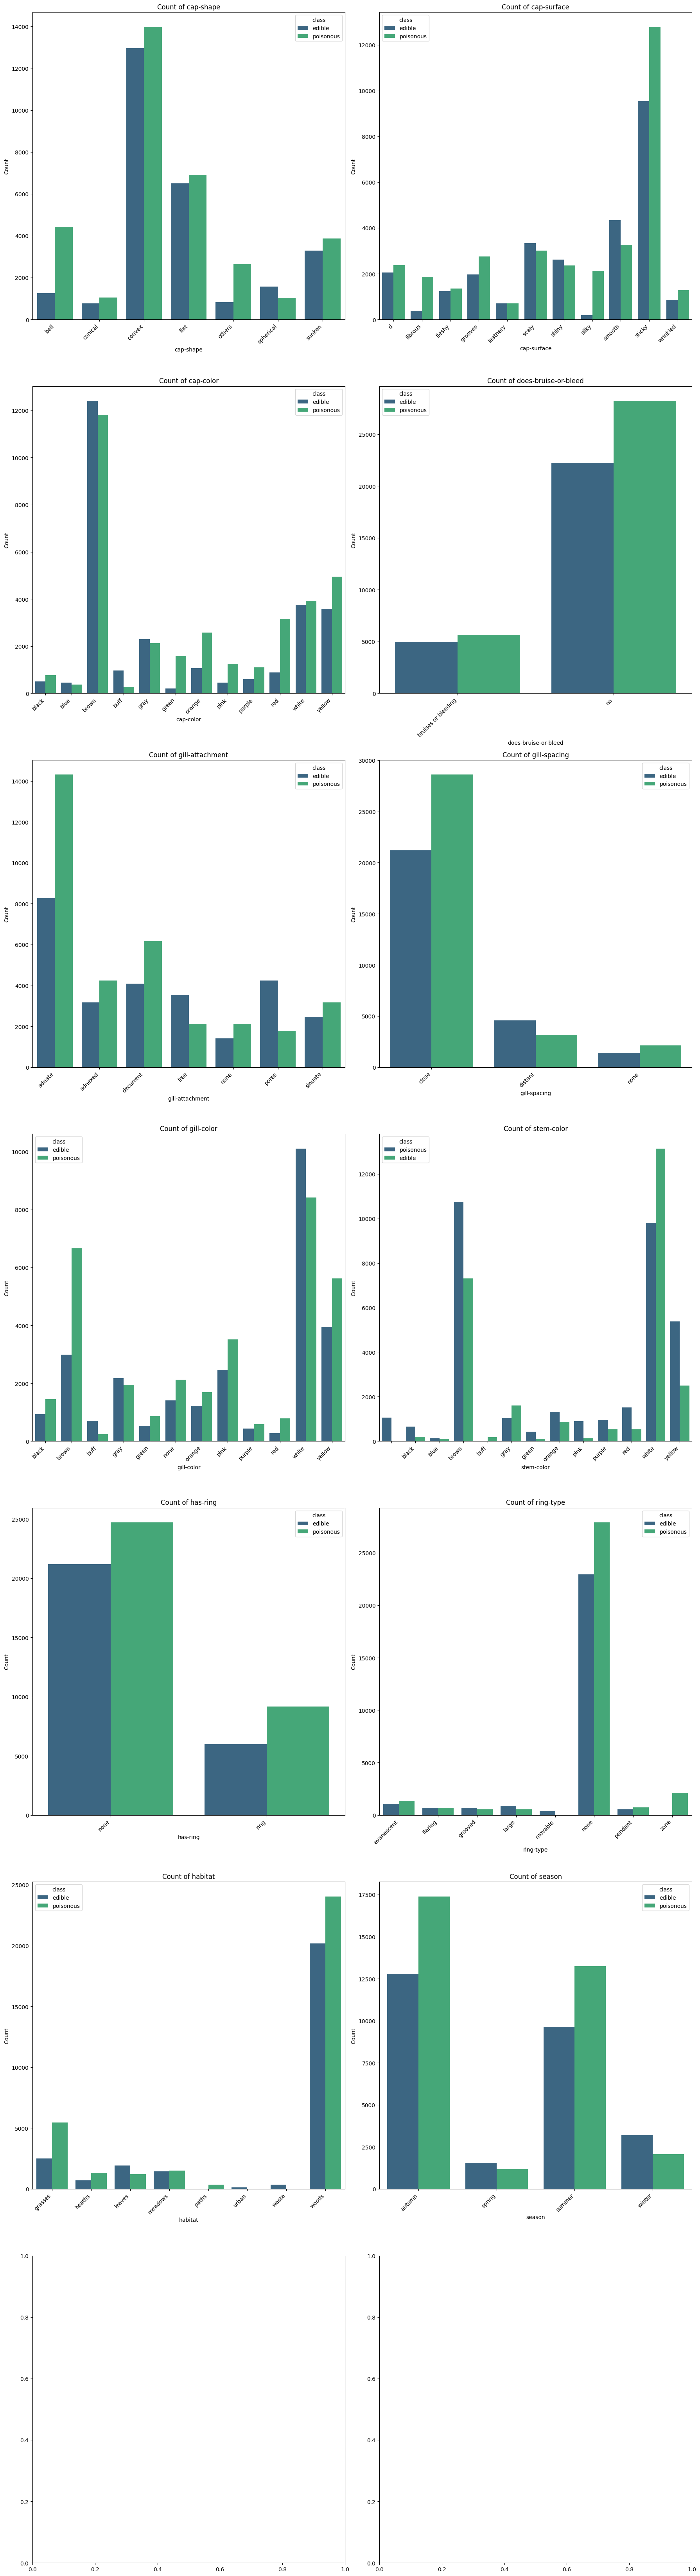

In [ ]:
def plot_count(x,ax):
    group = df_copy.groupby([f'{x}','class'])['class'].count().reset_index(name='Count')
    sns.barplot(data=group,x=x,y='Count',hue='class',palette='viridis',ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'Count of {x}')

exclude_columns = ['cap-diameter', 'stem-height', 'stem-width']
cols = [col for col in df_copy.columns if col not in exclude_columns]

fig, axes = plt.subplots(7, 2, figsize=(18,  11*6))

for index,column in enumerate(cols[1:]):
    row = index // 2
    col = index % 2
    ax = axes[row,col]
    plot_count(column, ax)

plt.tight_layout()
plt.show()

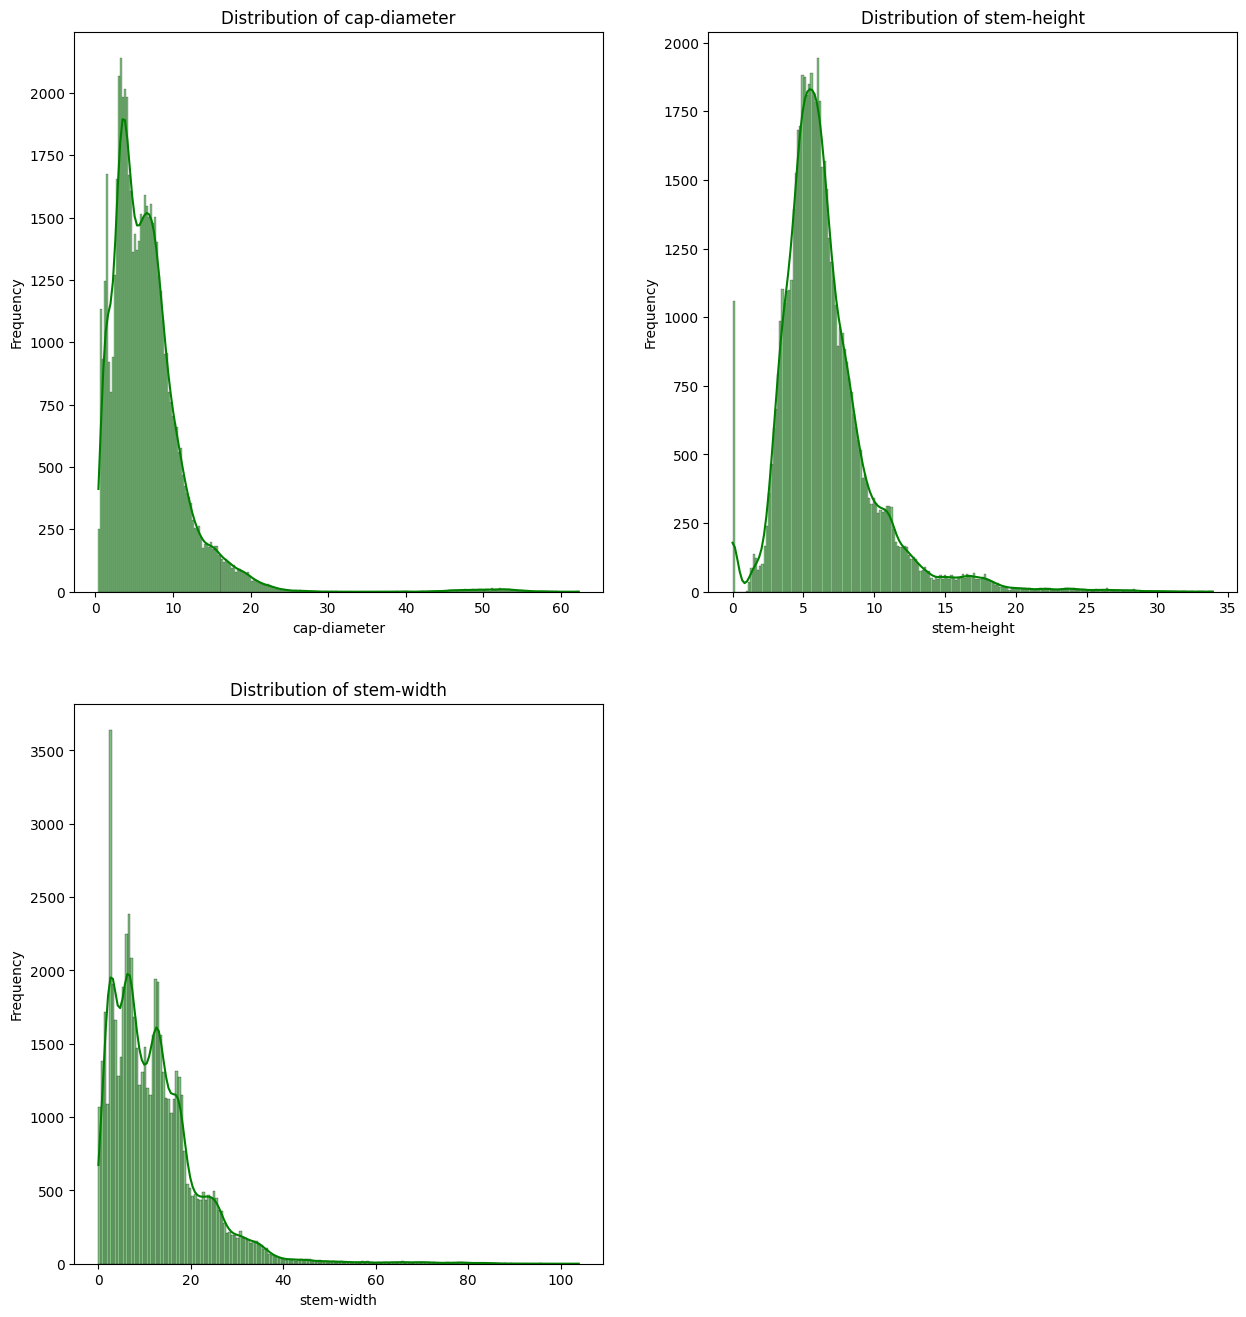

In [ ]:
numerical_attributes = df_copy.select_dtypes(include=['number']).columns
num_rows_num = (len(numerical_attributes) - 1) // 2 + 1

# Create subplots for numerical attributes
plt.figure(figsize=(15, 8 * num_rows_num))
for i, attr in enumerate(numerical_attributes):
    plt.subplot(num_rows_num, 2, i + 1)
    sns.histplot(df_copy[attr], kde=True, color='green')
    plt.xlabel(attr)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {attr}')

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>2.3 | Data Processing</div></b>

### <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>2.3.1 | Transform Data</div></b>

In [ ]:
# Display unique values for each attribute (column)
unique_values_by_column = df.apply(lambda x: x.unique())

# Display the result
print("Unique values by column:")
print(unique_values_by_column)

Unique values by column:
class                                                              [p, e]
cap-diameter            [15.26, 16.6, 14.07, 14.17, 14.64, 15.34, 14.8...
cap-shape                                           [x, f, p, b, c, s, o]
cap-surface                             [g, h, t, y, e, s, l, d, w, i, k]
cap-color                            [o, e, n, g, r, w, y, p, u, b, l, k]
does-bruise-or-bleed                                               [f, t]
gill-attachment                                     [e, a, d, s, x, p, f]
gill-spacing                                                    [c, d, f]
gill-color                           [w, n, p, u, b, g, y, r, e, o, k, f]
stem-height             [16.95, 17.99, 17.8, 15.77, 16.53, 17.84, 17.7...
stem-width              [17.09, 18.19, 17.74, 15.98, 17.2, 18.79, 16.8...
stem-color                        [w, y, n, u, b, l, r, p, e, k, g, o, f]
has-ring                                                           [t, f]
ring-type    

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

columns_to_encode = ['class','cap-shape', 'cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color','stem-color','has-ring', 'ring-type', 'habitat', 'season']
#'stem-surface',
# Apply the encoder to each of the columns
df[columns_to_encode] = df[columns_to_encode].apply(encoder.fit_transform)


In [ ]:
# Display unique values for each attribute (column)
unique_values_by_column = df.apply(lambda x: x.unique())

# Display the result
print("Unique values by column:")
print(unique_values_by_column)

Unique values by column:
class                                                              [1, 0]
cap-diameter            [15.26, 16.6, 14.07, 14.17, 14.64, 15.34, 14.8...
cap-shape                                           [6, 2, 4, 0, 1, 5, 3]
cap-surface                            [2, 3, 8, 10, 1, 7, 6, 0, 9, 4, 5]
cap-color                          [6, 1, 5, 2, 8, 10, 11, 7, 9, 0, 4, 3]
does-bruise-or-bleed                                               [0, 1]
gill-attachment                                     [2, 0, 1, 5, 6, 4, 3]
gill-spacing                                                    [0, 1, 2]
gill-color                         [10, 5, 7, 9, 0, 3, 11, 8, 1, 6, 4, 2]
stem-height             [16.95, 17.99, 17.8, 15.77, 16.53, 17.84, 17.7...
stem-width              [17.09, 18.19, 17.74, 15.98, 17.2, 18.79, 16.8...
stem-color                     [11, 12, 6, 10, 0, 5, 9, 8, 1, 4, 3, 7, 2]
has-ring                                                           [1, 0]
ring-type    

In [ ]:
df.describe()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
count,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000
mean,0.554913,6.733854,4.041641,6.065025,6.144541,0.173410,2.109990,0.242775,7.338502,6.581538,12.149410,8.429072,0.248555,1.449999,0.623721,1.053300
std,0.496979,5.264845,2.138630,3.063499,3.171077,0.378605,2.204614,0.547217,3.186426,3.370017,10.035955,3.218516,0.432179,1.468299,1.265880,1.100575
min,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.480000,2.000000,3.000000,5.000000,0.000000,0.000000,0.000000,5.000000,4.640000,5.210000,6.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,5.860000,5.000000,8.000000,5.000000,0.000000,1.000000,0.000000,7.000000,5.950000,10.190000,11.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,8.540000,6.000000,8.000000,10.000000,0.000000,4.000000,0.000000,10.000000,7.740000,16.570000,11.000000,0.000000,1.000000,1.000000,2.000000
max,1.000000,62.340000,6.000000,10.000000,11.000000,1.000000,6.000000,2.000000,11.000000,33.920000,103.910000,12.000000,1.000000,7.000000,7.000000,3.000000


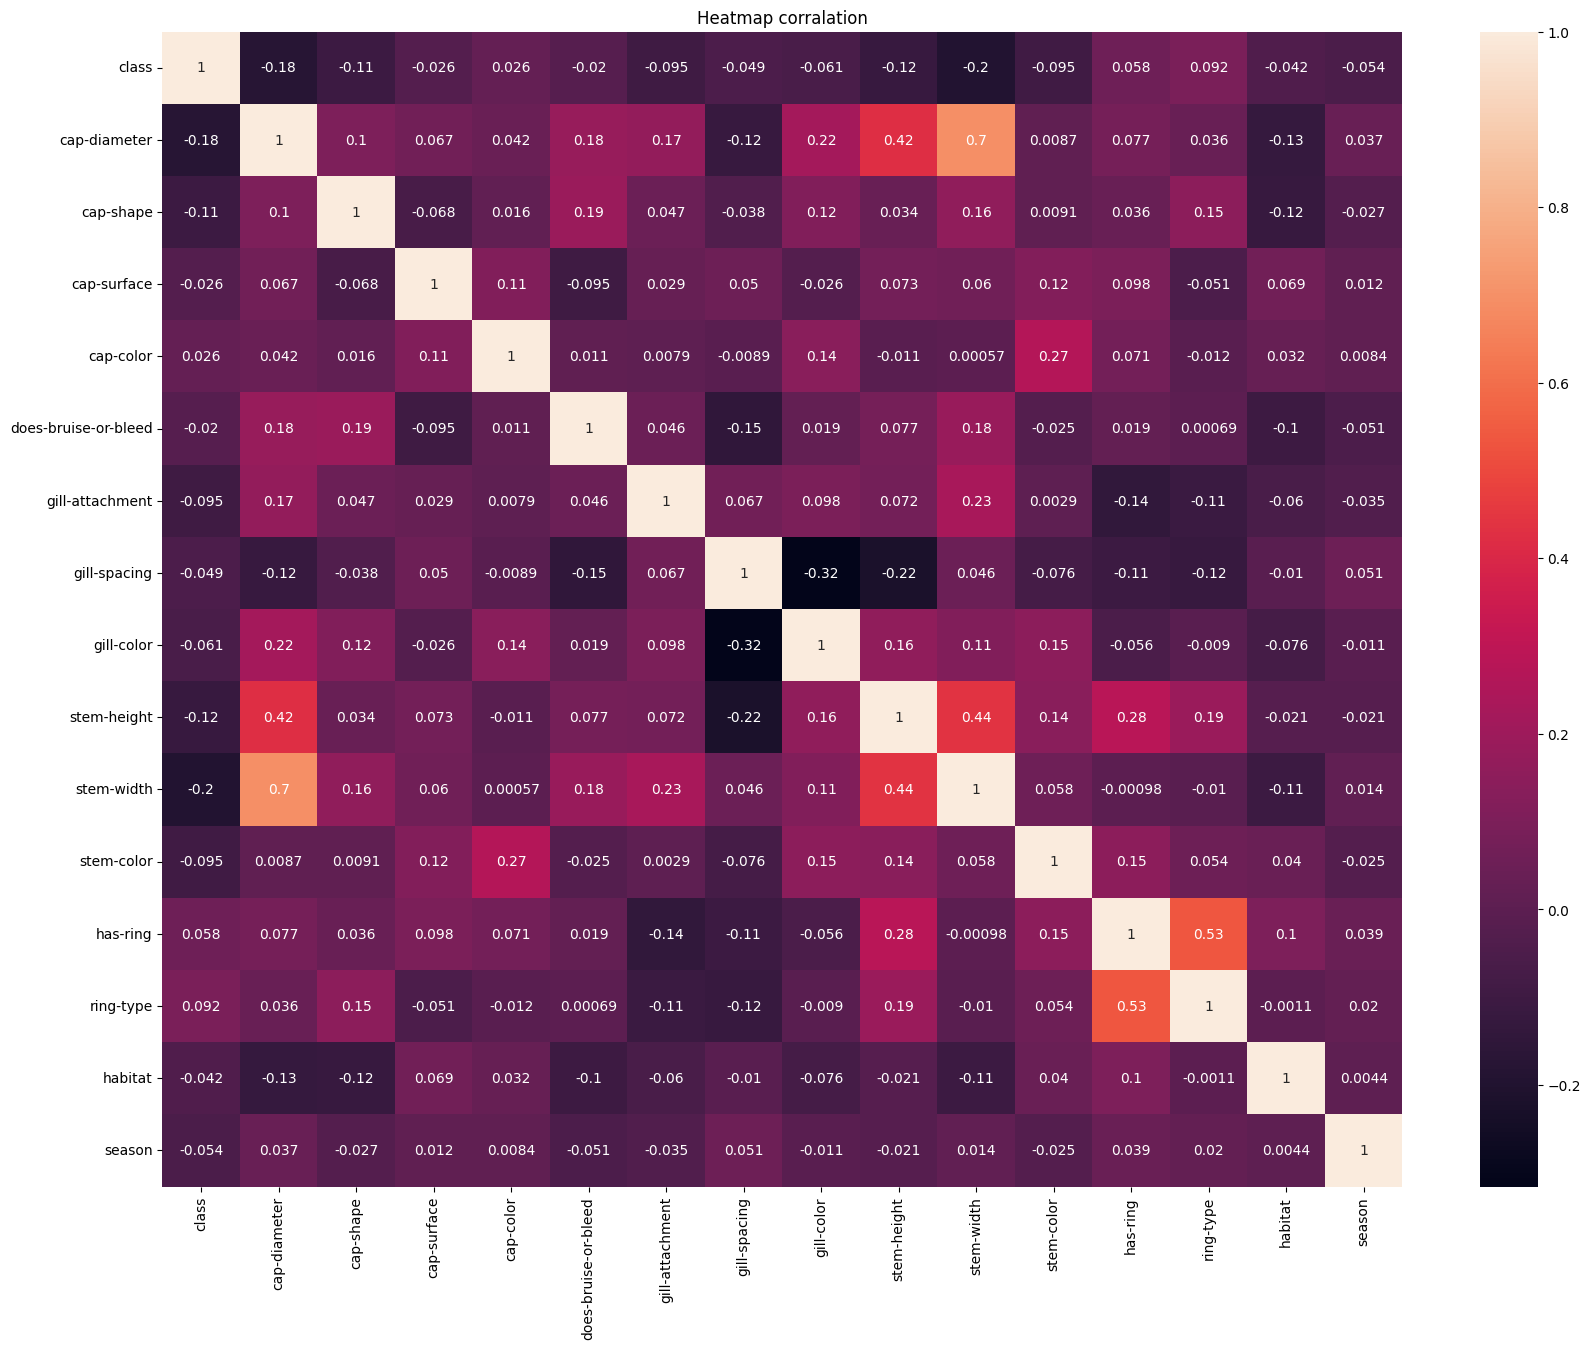

In [ ]:
plt.figure(figsize=(20,15))
plt.title('Heatmap corralation')
sns.heatmap(data=pd.get_dummies(df).corr(), annot=True);

- Đối với heat map tương quan, ô nào gần bằng 0 thì khả năng thuộc tính tương ứng với ô đó không ảnh hưởng nhiều đến kết quả.
- ví dụ từ hàng class, giá trị -0.02 (does bruise or bleed) là gần bằng 0 nhất => thuộc tính này không tương quan gì đến kết quả

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
# scaler = StandardScaler()
# X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
#Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>3 | Decision Tree</div></b>

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>3.1 | Basic Model Decision Tree</div></b>

In [ ]:
# Bước 1: Huấn luyện mô hình
# Bước 2: Cho mô hình dư đoán
# Bước 3: Kiểm tra độ chính xác của mô hình đó (nếu quá thấp thì cho Tuning dữ liệu)
# Bước 4: Tuning dữ liệu
# Bước 5: Đánh giá mô hình

In [ ]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set(du doan tren tap kiem tra)
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the model(danh gia chinh xac mo hinh)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.9946782380874406


Training Accuracy =  100.0  %
Testing Accuracy =  99.47  %


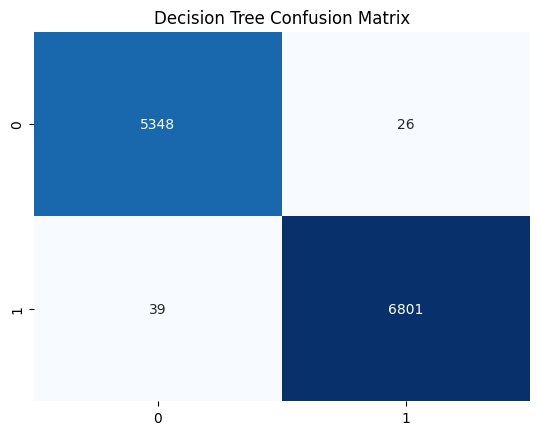

In [ ]:
cm = confusion_matrix(y_test, y_pred)
tree_train_acc = round(accuracy_score(y_train,dt_classifier.predict(X_train))*100,2)
tree_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , tree_train_acc,' %')
print('Testing Accuracy = ' , tree_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Decision Tree Confusion Matrix');

In [ ]:
# Visualize the Decision Tree
# plt.figure(figsize=(25, 20))
# plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=["Class e", "Class p"])
# plt.show()

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>3.2 | Tunning Hyperparameter</div></b>

In [ ]:
#Find the best max-depth for DT algorithm
# Define a range of max_depth values to iterate over
max_depth_values = range(10, 41, 1)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth = None
best_score = 0.0

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42, criterion = 'entropy')
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(X_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 10: Test Score = 0.9103487800884231
Max Depth = 11: Test Score = 0.9412968724414607
Max Depth = 12: Test Score = 0.9623383003111184
Max Depth = 13: Test Score = 0.9793679384313083
Max Depth = 14: Test Score = 0.9830522351400033
Max Depth = 15: Test Score = 0.9905027018175864
Max Depth = 16: Test Score = 0.9948419846078271
Max Depth = 17: Test Score = 0.9968069428524644
Max Depth = 18: Test Score = 0.9971344358932372
Max Depth = 19: Test Score = 0.9969706893728508
Max Depth = 20: Test Score = 0.9970525626330441
Max Depth = 21: Test Score = 0.9970525626330441
Max Depth = 22: Test Score = 0.9970525626330441
Max Depth = 23: Test Score = 0.9970525626330441
Max Depth = 24: Test Score = 0.9970525626330441
Max Depth = 25: Test Score = 0.9970525626330441
Max Depth = 26: Test Score = 0.9970525626330441
Max Depth = 27: Test Score = 0.9970525626330441
Max Depth = 28: Test Score = 0.9970525626330441
Max Depth = 29: Test Score = 0.9970525626330441
Max Depth = 30: Test Score = 0.997052562

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>3.3 | Final Model And Evaluate</div></b>

In [ ]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=18, random_state = 42, criterion = 'entropy')
#dt_classifier = DecisionTreeClassifier( random_state=42)
# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")
# Classification Report
print('-'*53)
#Report
print(' Classifier Report:\n\n{}\n'.format(classification_report(y_test, y_pred)))

Decision Tree Accuracy: 0.9971344358932372
-----------------------------------------------------
 Classifier Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214




Training Accuracy =  99.95  %
Testing Accuracy =  99.71  %


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

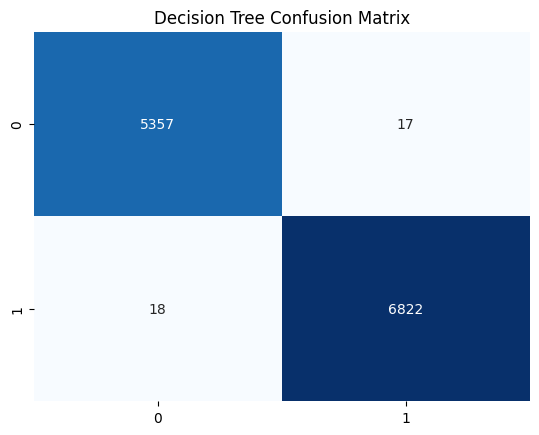

In [ ]:
y_pred = dt_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
tree_train_acc = round(accuracy_score(y_train,dt_classifier.predict(X_train))*100,2)
tree_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , tree_train_acc,' %')
print('Testing Accuracy = ' , tree_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Decision Tree Confusion Matrix')

- Quá trình tinh chỉnh đã giúp giảm dự đoán sai lệch, so sánh confusion matrix sẽ thấy sự khác biệt

In [ ]:
# Đánh giá độ chính xác của mô hình
accuracy_crossval = cross_val_score(dt_classifier,X,y, cv=KFold(n_splits = 5, shuffle = True, random_state = 42), scoring='accuracy')
print('accuracy of each fold')
print(accuracy_crossval)
print(f'average accuracy of cross validation: {accuracy_crossval.mean()}')

accuracy of each fold
[0.99713444 0.99828066 0.99639758 0.99181267 0.99697044]
average accuracy of cross validation: 0.9961191578588723


In [ ]:
from sklearn.tree import export_text
# Export the text representation of the decision tree
tree_rules = export_text(clf, feature_names=X.columns.tolist())
print(tree_rules)

|--- stem-width <= 8.22
|   |--- gill-spacing <= 0.50
|   |   |--- cap-surface <= 3.50
|   |   |   |--- gill-color <= 10.50
|   |   |   |   |--- gill-color <= 3.50
|   |   |   |   |   |--- ring-type <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- ring-type >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- gill-color >  3.50
|   |   |   |   |   |--- cap-shape <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- cap-shape >  0.50
|   |   |   |   |   |   |--- does-bruise-or-bleed <= 0.50
|   |   |   |   |   |   |   |--- cap-surface <= 2.50
|   |   |   |   |   |   |   |   |--- stem-color <= 3.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- stem-color >  3.50
|   |   |   |   |   |   |   |   |   |--- stem-color <= 11.50
|   |   |   |   |   |   |   |   |   |   |--- stem-width <= 5.30
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- stem-widt

- Lấy ví dụ 1 rule nấm có độc và 1 rule nấm không có độc

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

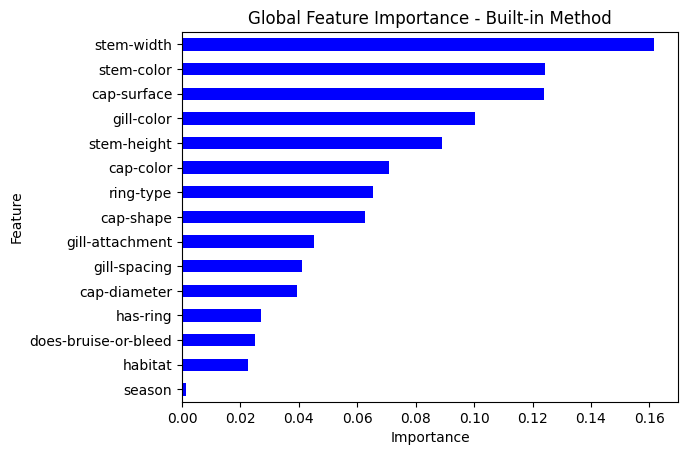

In [ ]:
import pandas as pd
global_importances = pd.Series(dt_classifier.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='Blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

- Biểu đồ feature importance cho thấy Stem-with là thuộc tính có mức ảnh hưởng cao nhất đối với model Decision tree
- Top 3 thuộc tính quan trọng: stem-width, stem-surface, cap-surface

# <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>4 | Random Forest</div></b>

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>4.1 | Basic Model Random Forest</div></b>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdm_frst = RandomForestClassifier()
rdm_frst.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rdm_frst.predict(X_test)

Training Accuracy =  100.0  %
Testing Accuracy =  99.99  %


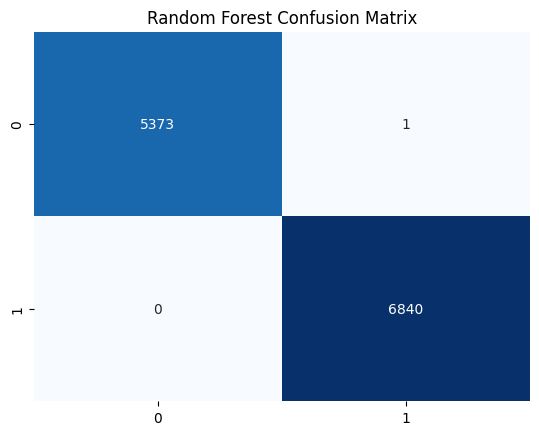

In [ ]:
cm = confusion_matrix(y_test, y_pred)
rdm_train_acc = round(accuracy_score(y_train,rdm_frst.predict(X_train))*100,2)
rdm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , rdm_train_acc,' %')
print('Testing Accuracy = ' , rdm_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Random Forest Confusion Matrix');

- Có thể không cần tinh chỉnh random forest nữa vì model baseline đã quá tốt, hầu như dự đoán đúng hoàn toàn

In [ ]:
# Classification Report
#Report
print(' Classifier Report:\n\n{}\n'.format(classification_report(y_test, y_pred)))

 Classifier Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214




In [ ]:
# Đánh giá độ chính xác
accuracy_crossval = cross_val_score(rdm_frst,X,y, cv=KFold(n_splits = 5, shuffle = True, random_state = 42), scoring='accuracy')
print('accuracy of each fold')
print(accuracy_crossval)
print(f'average accuracy of cross validation: {accuracy_crossval.mean()}')

accuracy of each fold
[1.         0.99975438 0.99983625 0.99975438 0.99967248]
average accuracy of cross validation: 0.9998034988125125


In [ ]:
# Export the text representation of the selected decision tree
# rule của cây đầu tiên
tree_rules = export_text(rdm_frst.estimators_[0], feature_names=X.columns.tolist())
print(tree_rules)

|--- stem-height <= 4.14
|   |--- cap-shape <= 2.50
|   |   |--- gill-spacing <= 0.50
|   |   |   |--- stem-height <= 2.72
|   |   |   |   |--- cap-color <= 4.50
|   |   |   |   |   |--- cap-surface <= 7.50
|   |   |   |   |   |   |--- cap-surface <= 3.00
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- cap-surface >  3.00
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- cap-surface >  7.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- cap-color >  4.50
|   |   |   |   |   |--- stem-height <= 2.67
|   |   |   |   |   |   |--- does-bruise-or-bleed <= 0.50
|   |   |   |   |   |   |   |--- habitat <= 0.50
|   |   |   |   |   |   |   |   |--- stem-color <= 10.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- stem-color >  10.50
|   |   |   |   |   |   |   |   |   |--- stem-width <= 7.54
|   |   |   |   |   |   |   |   |   |   |--- cap-surface <= 5.00
|   |   |   |   |   |   |   |   |   |   

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

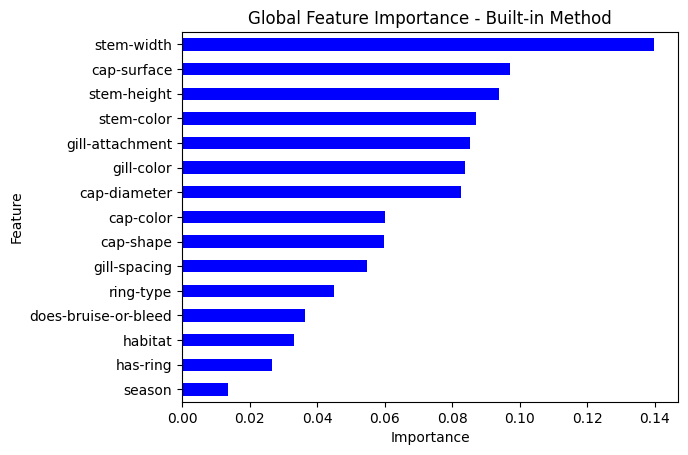

In [ ]:
global_importances = pd.Series(rdm_frst.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='Blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

# <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>5 | SVM (SUPPORT VECTOR MACHINE)</div></b>

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>5.1 | Basic Model</div></b>

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.datasets import load_breast_cancer
# from sklearn.svm import SVC

# # train the model on train set
# model = SVC()
# model.fit(X_train, y_train)

# # print prediction results
# predictions = model.predict(X_test)

# #result
# cm = confusion_matrix(y_test, predictions)
# rdm_train_acc = round(accuracy_score(y_train,model.predict(X_train))*100,2)
# rdm_test_acc = round(accuracy_score(y_test,predictions)*100,2)
# print('Training Accuracy = ' , rdm_train_acc,' %')
# print('Testing Accuracy = ' , rdm_test_acc,' %')
# sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
# plt.title('Random Forest Confusion Matrix')

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>5.2 | Tuning Hyperparameter</div></b>

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100],
#               'kernel': ['linear', 'rbf'],
#               'gamma': [0.1, 0.01, 0.001],
#               'degree': [2, 3, 4]}

# grid = GridSearchCV(SVC(),
#                     param_grid,
#                     cv = KFold(n_splits = 5, shuffle = True, random_state = 42),
#                     n_jobs = -1,
#                     scoring = 'accuracy',
#                     verbose = 1)

# # fitting the model for grid search
# grid.fit(X_train, y_train)

In [ ]:
# # print best parameter after tuning
# print(grid.best_params_)
# print(grid.best_score_)
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>5.3 | Final Model And Evaluate</div></b>

In [ ]:
# # train the model on train set
# best_SVC = SVC(**grid.best_params_)
# best_SVC.fit(X_train, y_train)

# # print prediction results
# predictions = best_SVC.predict(X_test)

# #result
# cm = confusion_matrix(y_test, predictions)
# rdm_train_acc = round(accuracy_score(y_train,best_SVC.predict(X_train))*100,2)
# rdm_test_acc = round(accuracy_score(y_test,predictions)*100,2)
# print('Training Accuracy = ' , rdm_train_acc,' %')
# print('Testing Accuracy = ' , rdm_test_acc,' %')
# sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
# plt.title('Random Forest Confusion Matrix')

In [ ]:
# print(' Classifier Report:\n\n{}\n'.format(classification_report(y_test, predictions)))

In [ ]:
# # Đánh giá độ chính xác
# accuracy_crossval = cross_val_score(best_SVC,X,y, cv=KFold(n_splits = 5, shuffle = True, random_state = 42), scoring='accuracy')
# print('accuracy of each fold')
# print(accuracy_crossval)
# print(f'average accuracy of cross validation: {accuracy_crossval.mean()}')

# <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>6 | ADABOOST MODEL</div></b>

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>6.1 | Basic Model</div></b>

In [ ]:
boost_tree = AdaBoostClassifier()
boost_tree.fit(X_train, y_train)
y_pred = boost_tree.predict(X_test)

Training Accuracy =  76.79  %
Testing Accuracy =  76.39  %


Text(0.5, 1.0, 'Adaboost Confusion Matrix')

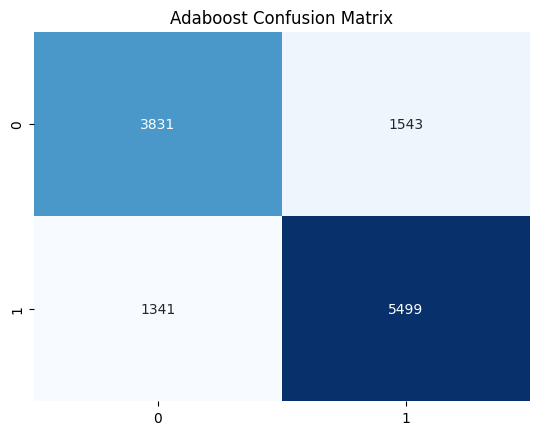

In [ ]:
cm = confusion_matrix(y_test, y_pred)
adb_train_acc = round(accuracy_score(y_train,boost_tree.predict(X_train))*100,2)
adb_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , adb_train_acc,' %')
print('Testing Accuracy = ' , adb_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Adaboost Confusion Matrix')

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>6.2 | Tuning Hyperparameter</div></b>

In [ ]:
boost_tree = AdaBoostClassifier()
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [ 0.5, 1.0],
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}

# Create a Grid Search object
grid_search = GridSearchCV(boost_tree,
                           param_grid,
                           cv=KFold(n_splits = 5, shuffle = True, random_state = 42),
                           scoring='accuracy',
                           n_jobs = -1,
                           verbose = 1)

# Fit the model to the training data and find the best parameters
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2)],
                         'learning_rate': [0.5, 1.0],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
#best_model = grid_search.best_estimator_
print(f'best_score {best_score}')
print(f'best parameters: {best_params}')

best_score 0.9954150035820284
best parameters: {'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 1.0, 'n_estimators': 200}


##**6.3 | Final Model And Evaluate**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Accuracy =  99.65  %
Testing Accuracy =  99.65  %


Text(0.5, 1.0, 'Adaboost Confusion Matrix')

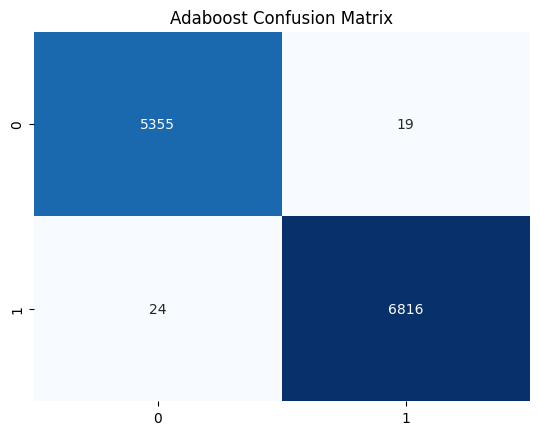

In [ ]:
#best parameters: {'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 1.0, 'n_estimators': 200}
best_boostTree = AdaBoostClassifier(**best_params)

best_boostTree.fit(X_train, y_train)
y_pred = best_boostTree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
adb_train_acc = round(accuracy_score(y_train,best_boostTree.predict(X_train))*100,2)
adb_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , adb_train_acc,' %')
print('Testing Accuracy = ' , adb_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Adaboost Confusion Matrix')

In [ ]:
print(' Classifier Report:\n\n{}\n'.format(classification_report(y_test, y_pred)))

 Classifier Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214




In [ ]:
# Đánh giá độ chính xác
accuracy_crossval = cross_val_score(best_boostTree,X,y, cv=KFold(n_splits = 5, shuffle = True, random_state = 42), scoring='accuracy')
print('accuracy of each fold')
print(accuracy_crossval)
print(f'average accuracy of cross validation: {accuracy_crossval.mean()}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


accuracy of each fold
[0.99647945 0.99385951 0.99287703 0.99435075 0.99697044]
average accuracy of cross validation: 0.9949074336080127


Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

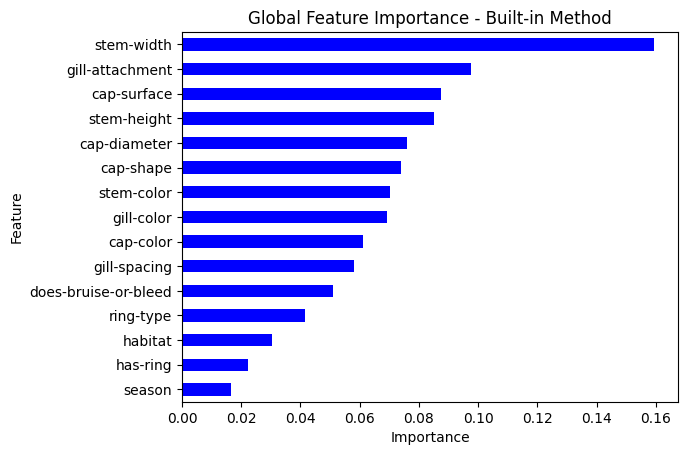

In [ ]:
global_importances = pd.Series(best_boostTree.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='Blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

# <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>7 | Comparing Models</div></b>

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
pd.set_option('display.max_columns', None)

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Adaboost','Decision Tree', 'Random Forest'
    ],
    'Training Accuracy': [
        adb_train_acc,tree_train_acc,rdm_train_acc
     ],
    'Testing Accuracy': [
       adb_test_acc,tree_test_acc,rdm_test_acc
    ]
})

In [ ]:
models.sort_values(by=['Testing Accuracy','Training Accuracy'], ascending=False).style.background_gradient(
        cmap='coolwarm')

,Model,Training Accuracy,Testing Accuracy
2,Random Forest,100.000000,99.990000
1,Decision Tree,99.950000,99.710000
0,Adaboost,99.650000,99.650000


# <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>8 | PREDICT UNSEEN DATA</div></b>

In [ ]:
df_con=pd.read_csv("/content/sample_data/secondary_data.csv")
#df_con=pd.read_csv("/content/sample_data/Book2.csv")

In [ ]:
null_values_by_column = df_con.isnull().sum()

In [ ]:
null_values_by_column

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [ ]:
df_con = df_con.drop('veil-type', axis=1)
df_con = df_con.drop('veil-color', axis=1)
df_con = df_con.drop('stem-root', axis=1)
df_con = df_con.drop('spore-print-color', axis=1)
df_con = df_con.drop('stem-surface', axis=1)

In [ ]:
df_con['cap-surface'].fillna(df_con['cap-surface'].mode()[0], inplace=True)

# Xử lý giá trị thiếu cho cột gill-attachment
df_con['gill-attachment'].fillna(df_con['gill-attachment'].mode()[0], inplace=True)

# Xử lý giá trị thiếu cho cột gill-spacing
df_con['gill-spacing'].fillna(df_con['gill-spacing'].mode()[0], inplace=True)

# Xử lý giá trị thiếu cho cột ring-type
df_con['ring-type'].fillna(df_con['ring-type'].mode()[0], inplace=True)

In [ ]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-color            61069 non-null  object 
 12  has-ring              61069 non-null  object 
 13  ring-type             61069 non-null  object 
 14  habitat               61069 non-null  object 
 15  season             

In [ ]:
encoder = LabelEncoder()

columns_to_encode = ['class','cap-shape', 'cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color','stem-color','has-ring', 'ring-type', 'habitat', 'season']

# Apply the encoder to each of the columns
df_con[columns_to_encode] = df_con[columns_to_encode].apply(encoder.fit_transform)

In [ ]:
y = df_con['class']
df_con = df_con.drop('class', axis = 1)


In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df_con), columns=df_con.columns)

In [ ]:
#random forest
y_pred = rdm_frst.predict(X_test)
y_pred_con_by_random_forest = rdm_frst.predict(df_con)
# decision tree
y_pred_con_by_DT = dt_classifier.predict(df_con)
y_pred_con_by_adaboost = best_boostTree.predict(df_con)

In [ ]:
from collections import Counter
Counter(y_pred_con_by_adaboost)

Counter({1: 33849, 0: 27220})